# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<AxesSubplot:>

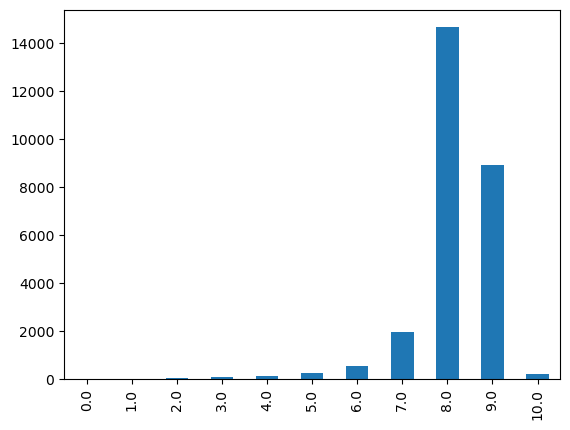

In [27]:
sinasc['APGAR1'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

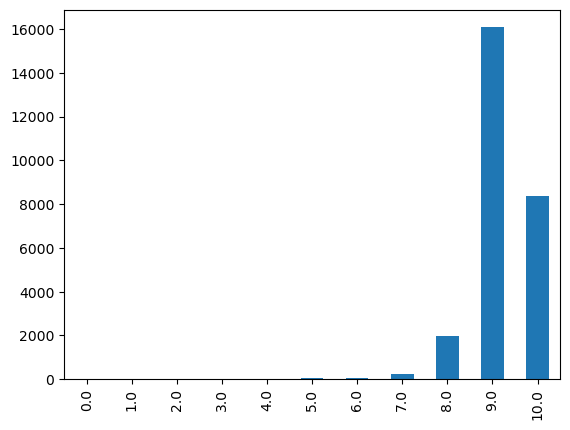

In [28]:
sinasc['APGAR5'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

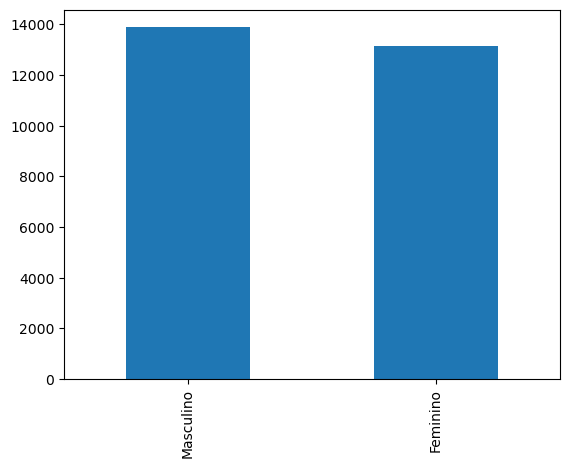

In [29]:
sinasc['SEXO'].value_counts().plot.bar()

<AxesSubplot:>

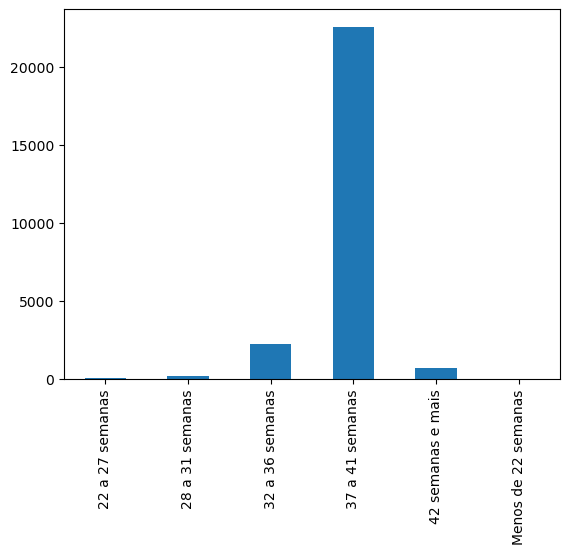

In [31]:
sinasc['GESTACAO'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

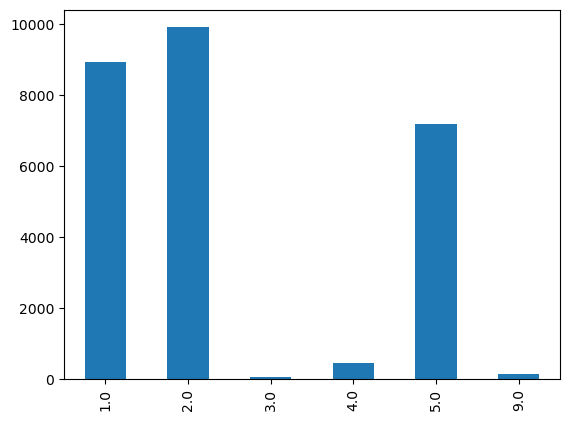

In [32]:
sinasc['ESTCIVMAE'].value_counts().sort_index().plot.bar()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<AxesSubplot:xlabel='CONSULTAS', ylabel='APGAR5_MEDIO'>

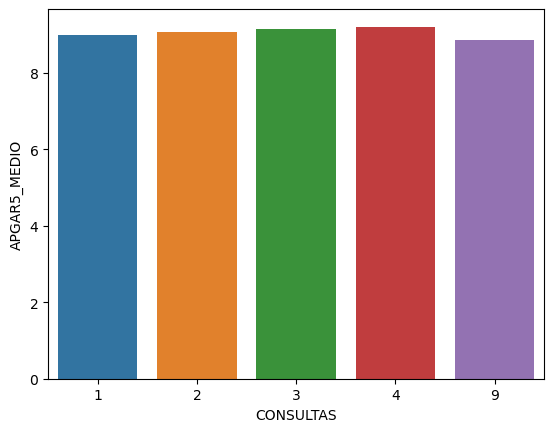

In [66]:
consultas = [{'CONSULTAS':'1','APGAR5_MEDIO':'0'},
            {'CONSULTAS':'2','APGAR5_MEDIO':'0'},
            {'CONSULTAS':'3','APGAR5_MEDIO':'0'},
            {'CONSULTAS':'4','APGAR5_MEDIO':'0'},
            {'CONSULTAS':'9','APGAR5_MEDIO':'0'}]

apgar5_por_consultas = pd.DataFrame(consultas) 

apgar5_por_consultas['APGAR5_MEDIO'][0] = sinasc.loc[sinasc['CONSULTAS'] == 1]['APGAR5'].mean()
apgar5_por_consultas['APGAR5_MEDIO'][1] = sinasc.loc[sinasc['CONSULTAS'] == 2]['APGAR5'].mean()
apgar5_por_consultas['APGAR5_MEDIO'][2] = sinasc.loc[sinasc['CONSULTAS'] == 3]['APGAR5'].mean()
apgar5_por_consultas['APGAR5_MEDIO'][3] = sinasc.loc[sinasc['CONSULTAS'] == 4]['APGAR5'].mean()
apgar5_por_consultas['APGAR5_MEDIO'][4] = sinasc.loc[sinasc['CONSULTAS'] == 9]['APGAR5'].mean()

sns.barplot(x='CONSULTAS', y='APGAR5_MEDIO', data=apgar5_por_consultas)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

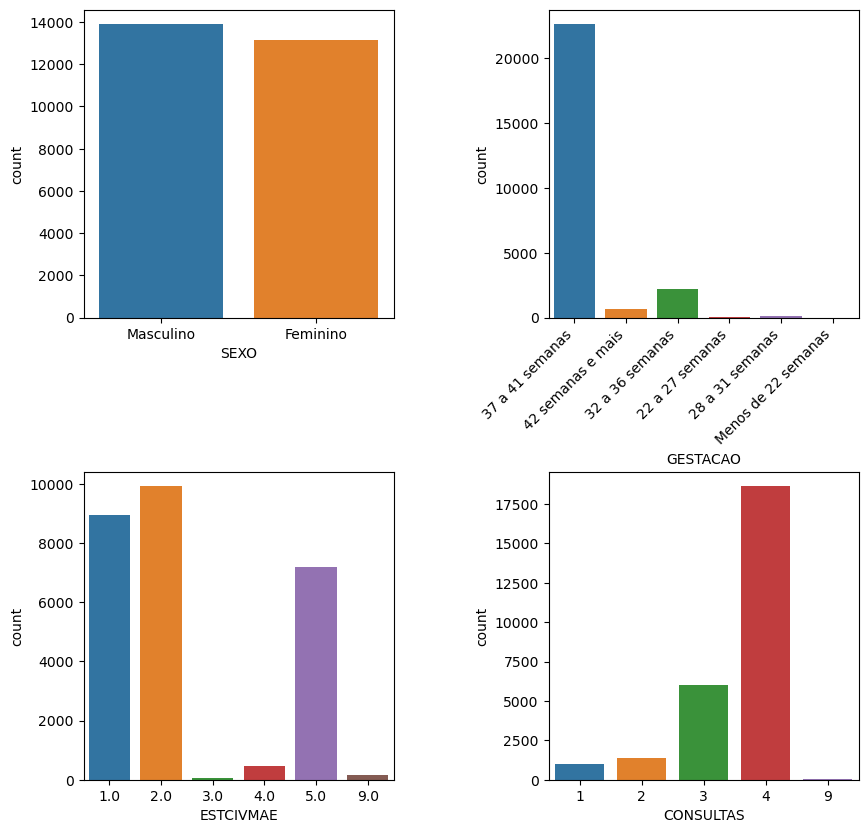

In [93]:
plt.rc('figure', figsize=(10, 10))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0,0], x='SEXO',data=sinasc)
sns.countplot(ax = axes[0,1], x='GESTACAO',data=sinasc).set_xticklabels(sns.countplot(ax = axes[0,1], x='GESTACAO',data=sinasc).get_xticklabels(), rotation=45, horizontalalignment='right')
sns.countplot(ax = axes[1,0], x='ESTCIVMAE',data=sinasc)
sns.countplot(ax = axes[1,1], x='CONSULTAS',data=sinasc)

plt.subplots_adjust(wspace=0.5, hspace=0.5)